# UAS Machine Learning – Task 1  
## Exploratory Data Analysis (EDA) and Data Preparation

### Objective  
Notebook ini bertujuan untuk melakukan eksplorasi awal terhadap dataset yang digunakan dalam tugas UAS, serta melakukan pembersihan dan persiapan data sebelum digunakan dalam pemodelan machine learning.

### Dataset Overview  
Dataset yang digunakan berisi sekumpulan data dengan berbagai fitur numerik dan/atau kategorikal yang akan digunakan untuk memprediksi variabel target. Pada tahap ini, struktur data, tipe data, serta distribusi setiap fitur dianalisis untuk memahami karakteristik data.

### Steps Performed  
Proses yang dilakukan dalam notebook ini meliputi:
1. Memuat dataset dan menampilkan beberapa baris awal untuk memahami struktur data.
2. Mengecek jumlah baris, kolom, tipe data, dan nilai yang hilang (missing values).
3. Melakukan analisis statistik deskriptif seperti mean, median, dan standar deviasi.
4. Menganalisis distribusi data dan potensi outlier.
5. Melakukan pembersihan data dengan menangani missing values dan data duplikat.

### Output  
Hasil dari tahap ini adalah dataset yang sudah lebih bersih dan siap untuk digunakan pada tahap feature engineering dan pemodelan.

# Import Libraries
Mengimpor library dasar (os, sys) untuk persiapan lingkungan dan path.

In [7]:
import os
import sys

# Download Dataset
Mengunduh dataset dari Google Drive dan menyimpannya ke folder lokal.

In [4]:
!pip install -q gdown

# kalian download semua file dari gdrive dibawah lalu buat folder (ex. midterm_folder)
!gdown --folder 1JvI5xhPfN3VmjpWYZk9fCHG41xG697um -O midterm_folder

Processing file 1ALveidCmKzk4p_liQ7b663BXL0PcTaFN test_transaction.csv
Processing file 1Ujh37a1kTarNf3dSOSrj-hKDswULebYA train_transaction.csv


Retrieving folder contents
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN
From (redirected): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN&confirm=t&uuid=bb7a1ddd-5c70-4ff5-ba84-2b8f11f8bbe5
To: d:\Folder_Kuliah\ML\UAS\Task1\midterm_folder\test_transaction.csv

  0%|          | 0.00/613M [00:00<?, ?B/s]
  0%|          | 524k/613M [00:00<02:27, 4.16MB/s]
  0%|          | 1.57M/613M [00:00<02:04, 4.93MB/s]
  0%|          | 2.10M/613M [00:00<02:07, 4.78MB/s]
  1%|          | 3.15M/613M [00:00<01:51, 5.45MB/s]
  1%|          | 4.19M/613M [00:00<01:45, 5.76MB/s]
  1%|          | 5.24M/613M [00:00<01:42, 5.93MB/s]
  1%|          | 6.29M/613M [00:01<01:38, 6.16MB/s]
  1%|          | 7.34M/613M [00:01<01:38, 6.13MB/s]
  1%|▏         | 8.39M/613M [00:01<01:34, 6.40MB/s]
  2%|▏         | 9.44M/613M [00:01<01:32, 6.53MB/s]
  

# Load & EDA
Memuat dataset dan melakukan eksplorasi awal: menampilkan bentuk data, beberapa baris awal, info tipe data, dan statistik deskriptif.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./midterm_folder/train_transaction.csv")

print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe())


Shape: (590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


None

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


# Cek Missing Values
Menampilkan kolom yang memiliki missing value.

In [13]:
print(df.isnull().columns)


Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)


# Visualisasi Distribusi Target
Menampilkan distribusi kelas target (isFraud) dalam bentuk bar chart.

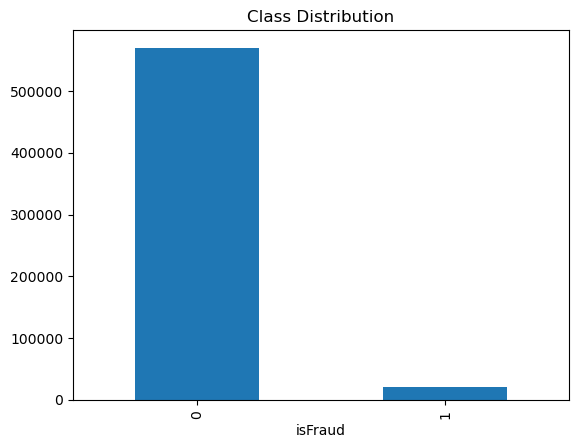

In [12]:
df['isFraud'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.show()


# Data Cleaning
Melakukan pembersihan data: mengisi missing value dan menghapus duplikat.

In [14]:
# Fill missing
df = df.fillna(df.median(numeric_only=True))

# Remove duplicates
df = df.drop_duplicates()


# Feature Engineering
Melakukan encoding fitur kategorikal menjadi numerik.

In [15]:
cat_cols = df.select_dtypes(include=['object']).columns

for c in cat_cols:
    df[c] = df[c].astype('category').cat.codes


# Split Feature dan Target
Memisahkan fitur (X) dan target (y) dari dataset.

In [17]:
X = df.drop(columns=['isFraud']).values
y = df['isFraud'].values


# Normalisasi Fitur
Melakukan normalisasi fitur agar memiliki skala yang seimbang.

In [18]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split Data Train dan Test
Membagi data menjadi data train dan test secara acak (80:20).

In [19]:
np.random.seed(42)
idx = np.random.permutation(len(X))
train_size = int(0.8 * len(X))

train_idx, test_idx = idx[:train_size], idx[train_size:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


# Train Model
Melatih dua model: Logistic Regression dan MLP.

Model 1 - Logistic Regression

In [20]:
import torch
import torch.nn as nn

class Logistic(nn.Module):
    def __init__(self, d):
        super().__init__()
        self.fc = nn.Linear(d, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

Xtr = torch.tensor(X_train, dtype=torch.float32)
ytr = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

model1 = Logistic(X_train.shape[1])
opt = torch.optim.Adam(model1.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

for _ in range(1000):
    pred = model1(Xtr)
    loss = loss_fn(pred, ytr)
    opt.zero_grad()
    loss.backward()
    opt.step()


Model 2 - MLP

In [21]:
class MLP(nn.Module):
    def __init__(self, d):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

model2 = MLP(X_train.shape[1])
opt2 = torch.optim.Adam(model2.parameters(), lr=0.001)

for _ in range(1500):
    pred = model2(Xtr)
    loss = loss_fn(pred, ytr)
    opt2.zero_grad()
    loss.backward()
    opt2.step()


# Komparasi Hasil Model
Membandingkan akurasi model Logistic Regression dan MLP pada data test.

In [22]:
Xte = torch.tensor(X_test, dtype=torch.float32)
yte = torch.tensor(y_test)

def accuracy(model):
    with torch.no_grad():
        p = (model(Xte) > 0.5).int().squeeze()
        return (p == yte).float().mean().item()

acc1 = accuracy(model1)
acc2 = accuracy(model2)

print("Logistic Accuracy:", acc1)
print("MLP Accuracy:", acc2)


Logistic Accuracy: 0.9711365699768066
MLP Accuracy: 0.9769787192344666


# Pilih Model Terbaik
Memilih model dengan akurasi terbaik sebagai model final.

In [24]:
best_model = model2 if acc2 > acc1 else model1
print("Best Model:", "MLP" if best_model == model2 else "Logistic Regression")


Best Model: MLP


# Tes Menggunakan Model Terbaik
Menghitung akurasi model terbaik pada data test.

In [25]:
with torch.no_grad():
    probs = best_model(Xte).squeeze().numpy()
    preds = (probs > 0.5).astype(int)

final_acc = (preds == y_test).mean()
print(f"Best Model Test Accuracy: {final_acc*100:.2f}%")


Best Model Test Accuracy: 97.70%


# Top Prediction
Menampilkan 10 prediksi dengan probabilitas tertinggi pada data test.

In [26]:
result = df.iloc[test_idx].copy()
result['pred'] = preds
result['prob'] = probs

display(result.sort_values('prob', ascending=False).head(10))


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V332,V333,V334,V335,V336,V337,V338,V339,pred,prob
440569,3427569,1,11172133,46.110,0,2256,545.0,185.0,3,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
508068,3495068,1,13303002,14.325,0,3154,408.0,185.0,2,224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
136668,3123668,1,2754579,100.000,1,6019,583.0,150.0,3,226.0,...,100.0,100.0,0.0,0.0,0.0,100.0,100.0,100.0,1,1.0
210116,3197116,1,4847294,49.672,0,11201,103.0,185.0,3,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
317055,3304055,1,7901007,26.585,0,5812,408.0,185.0,2,224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
476854,3463854,1,12343675,14.755,0,9387,500.0,185.0,2,197.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
414018,3401018,1,10446268,84.830,0,14076,545.0,185.0,3,147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
172688,3159688,1,3727550,150.000,2,13809,583.0,150.0,3,226.0,...,300.0,300.0,0.0,0.0,0.0,300.0,300.0,300.0,1,1.0
193482,3180482,1,4343993,7.929,0,9026,545.0,185.0,3,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
92334,3079334,1,1907358,150.000,1,12340,555.0,150.0,3,226.0,...,450.0,450.0,0.0,0.0,0.0,150.0,150.0,150.0,1,1.0
